# Hyades Data Analysis Workbook
---
Many thanks to Matt Khan for providing his plotting code and Robbie Scott for providing pyh2d and sample Hyades data - the following code will work off their works.

In [6]:
from pathlib import Path
import netCDF4                  # can use this or scipy module in line below
import numpy as np
import matplotlib.pyplot as plt

## 1. Importing Data
---

In [7]:
datafolderpath = Path('hyades_output/khan_SI/')

# Importing datafiles
laserData = np.loadtxt(datafolderpath/'laser_pulse_shape_final.txt', delimiter=',')
datafile = netCDF4.Dataset(datafolderpath/'hyImp35.cdf')

laserTime = laserData[:,0]
laserPow  = laserData[:,1]

# Variables:
#   tn = Fusion energy emission rate
#   fE = Fusion energy released
#   Tr = Radiation temperatures
#   dene = Electron density
variables_list = ['R','Rcm','Rho','Ti','Te','Pres','Bpeprdr','Bpeprd','Tr','Dene','DumpTimes']
variable_labels = ['r','rcm','rho','ti','te','p','tn','fE','tr','dene','time']
data = dict((label, datafile.variables[var][:]) for label, var in zip(variable_labels, variables_list))


Some calculations taken from Matt Khan's code:

In [8]:
neutronEmR  = np.sum(data['tn'][:,:],axis=1)
lasPow  = laserPow*(1500./np.max(laserPow))
neutronEmR *= 1800./np.max(neutronEmR)
fusionEnergy = 1E-7*np.sum(data['fE'][:],axis=1)[-1] # [J]

print(fusionEnergy)

195004519.11932412


#### **What does the our time data look like?**

The time data is a 1D array containing 530 timestamps:

In [9]:
print(f"Number of Timestamps (length of array)= {len(data['time'])}")
data['time']

Number of Timestamps (length of array)= 542


masked_array(data=[0.00000000e+00, 4.76890001e-11, 9.43698062e-11,
                   1.40741470e-10, 1.87596599e-10, 2.34410112e-10,
                   2.81342481e-10, 3.28131358e-10, 3.75114857e-10,
                   4.21947117e-10, 4.68841313e-10, 5.15608072e-10,
                   5.62541676e-10, 6.09420325e-10, 6.56188208e-10,
                   7.03223405e-10, 7.49930344e-10, 7.96872562e-10,
                   8.43860674e-10, 8.90594711e-10, 9.37452088e-10,
                   9.84563070e-10, 1.03142682e-09, 1.07823885e-09,
                   1.12491980e-09, 1.17177929e-09, 1.21877885e-09,
                   1.26588987e-09, 1.31258636e-09, 1.35957278e-09,
                   1.40621678e-09, 1.45329869e-09, 1.50023508e-09,
                   1.54693318e-09, 1.59379283e-09, 1.64076451e-09,
                   1.68777630e-09, 1.73422461e-09, 1.78112459e-09,
                   1.82846969e-09, 1.87505273e-09, 1.92198711e-09,
                   1.96864327e-09, 2.01559099e-09, 2.06280123e

#### **What does our `r` data look like?**
This is an 530 x 1058 array of zone boundary positions. I.e. at each timestamp `i` (ranging from `i=0` to `i=529`), there are 1058 data points.

In [10]:
data['r']

masked_array(
  data=[[0.00000000e+00, 9.59087500e-04, 1.91817500e-03, ...,
         1.75165567e-01, 1.75166487e-01, 1.75167400e-01],
        [0.00000000e+00, 9.59087500e-04, 1.91817500e-03, ...,
         1.75175933e-01, 1.75187058e-01, 1.75216243e-01],
        [0.00000000e+00, 9.59087500e-04, 1.91817500e-03, ...,
         1.75216570e-01, 1.75268021e-01, 1.75412598e-01],
        ...,
        [0.00000000e+00, 6.73577401e-04, 1.34715880e-03, ...,
         2.12127075e+00, 2.27675138e+00, 1.14388370e+01],
        [0.00000000e+00, 6.83823861e-04, 1.36765175e-03, ...,
         2.12307865e+00, 2.27876059e+00, 1.15969616e+01],
        [0.00000000e+00, 6.94064785e-04, 1.38813363e-03, ...,
         2.12488684e+00, 2.28077137e+00, 1.17550512e+01]],
  mask=False,
  fill_value=1e+20)

Plotting one of the zone boundaries `r` against `time`:

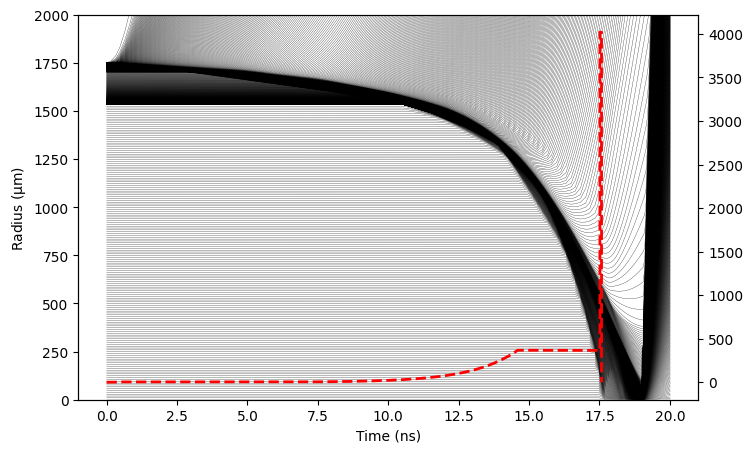

In [13]:
xdata = 1E9*data['time'] # times (now nanoseconds), length=530
ydata = 1E4*data['r'] # Zone boundaries (um). Transposed such that each index is one zone boundary from 0 to 1058.

fig, ax = plt.subplots(figsize=(8,5)) 

# Plotting (a sample of 150) zone boundaries 
indices = np.linspace(0, len(xdata)-1, 150).astype(int)
ax.plot(xdata[indices], ydata[indices], c="black", lw=0.2)
ax.plot([], [], c="black", lw=0.2, label='Zone Boundary') # Dummy Plot for Legend

ax2 = ax.twinx()
ax2.plot(laserTime, laserPow, color="red", linestyle="--", linewidth=2, zorder=10, label="Laser Pulse")

ax.set_ylim([0,2000])
ax.set_ylabel('Radius ($\\mathrm{\\mu}$m)')
ax.set_xlabel('Time (ns)')
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

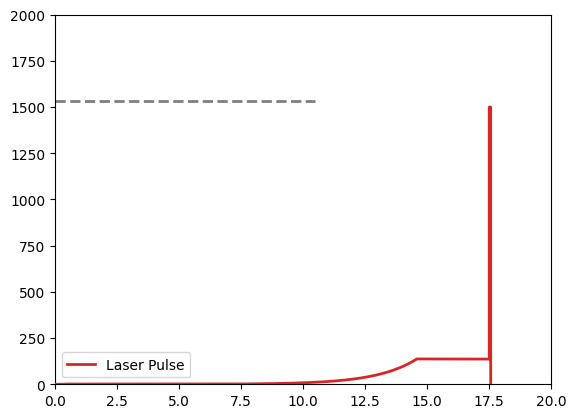

In [12]:
X, _ = np.meshgrid(xdata,ydata)

# Initialise Figure
# mpl.rcParams['font.size']=16
plt.figure()

# Labelling Points 
plt.axhline(y=1534.54,xmax=(10.479/20.),color="tab:grey",linestyle="--",linewidth=2)
plt.text(0.5,1400.0,"Inner Surface",color="white",horizontalalignment="left",zorder=10)
plt.text(0.5,1575.0,"DT Ice",       color="white",horizontalalignment="left",zorder=10)
plt.text(1.8,1800.0,"CH",           color="white",horizontalalignment="left",zorder=10)
plt.arrow(1.7,1830.0,-1.2,-110,color="white")

# 2D colour plot of density 
# plt.imshow(X.T,)
# plt.pcolormesh(X, 1e4*data['r'][:,:].T, np.log10(data['rho'][:,:]).T, vmin=np.min(np.log10(data['rho'][:,0]))) #np.log(dene[:,:].T))

# plt.pcolormesh(X,1e4*data['r'][:,:].T,data['rho'][:,:].T,vmin=np.min(data['rho'][:,0]))#np.log(dene[:,:].T))
plt.plot(laserTime,lasPow,color="tab:red",linestyle="-",linewidth=2,zorder=10,label="Laser Pulse")
# plt.plot(1e9*time[:],neutronEmR,color="black",linestyle="-",linewidth=2,label="Fusion Rate")
plt.legend(loc="lower left")
plt.ylim([0,2000])
plt.xlim([0,20])
cbar = plt.colorbar()
cbar.set_label(r"log$_{10}$(Mass Density (g/cm$^3$))")
plt.xlabel("Time (ns)")
plt.ylabel(r'Radius ($\mu$m)')
plt.tight_layout()
plt.show()